In [1]:
import glob
import re
import os
import sys
import kipoi
import numpy as np
import datetime
import warnings
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
"""#sys.argv=["python_prediction.py","9_37034476",5000,"PAX5",1, 100, 500000]
sys.argv=["python_prediction.py","22_38597889",5000,"MAFF",1, 100, 500000]
sys.argv[4]=int(sys.argv[4])
sys.argv[5]=int(sys.argv[5])
sys.argv[6]=int(sys.argv[6])
#my_data = np.genfromtxt("correlations/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", delimiter=',')
#my_data = np.genfromtxt("~/link_epi_to_expr/correlations_done/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", delimiter=',')

#column_names = np.arange(sys.argv[4],sys.argv[6],sys.argv[5])-1-sys.argv[6]/2
#with open('deepsea_postprocessing/predictor.names') as f:
#    row_names = f.read().splitlines()
"""

list_of_genes=sorted(glob.glob("correlations/correlations_*_*_*.csv.gz"))
corr_parameters = {}
a=511
for i in list_of_genes:
    my_data = pd.read_csv(i, sep=',',header=0,index_col=0)
    i=i.replace('_','/').replace('.','/').split('/')
    print(i)
    sys.argv=["python_prediction.py",str(i[-5])+'_'+str(i[-4]),5000,i[-3],1, 100, 500000]
    corr_parameters[i[-3]] = my_data.abs().max().mean(),my_data.abs().max().std(),stats.anderson(my_data.abs().max())[0]
    print(i[-3], end=' ')
    print(stats.anderson(my_data.abs().max())[0])
    my_data.abs().max().plot()
    plt.xlabel("Relative position to gene start")
    plt.ylabel("Highest correlation")
    plt.title("Highest correlation per position for {}".format(i[4]))
    #print("{}/{}_{}_{}_{}{}".format(i[0],i[1],i[2],i[3],i[4],".png"))
    plt.savefig("{}/{}_{}_{}_{}{}".format(i[0],i[1],i[2],i[3],i[4],".png"))
    plt.close()
    #plt.show()
    #break

['correlations', 'correlations', '10', '104154229', 'NFKB2', 'csv', 'gz']
NFKB2 nan
['correlations', 'correlations', '10', '114710009', 'TCF7L2', 'csv', 'gz']
TCF7L2 nan
['correlations', 'correlations', '10', '124895478', 'HMX3', 'csv', 'gz']
HMX3 nan
['correlations', 'correlations', '10', '124907638', 'HMX2', 'csv', 'gz']
HMX2 nan
['correlations', 'correlations', '10', '31607424', 'ZEB1', 'csv', 'gz']
ZEB1 80.61061576059001
['correlations', 'correlations', '10', '61666414', 'CCDC6', 'csv', 'gz']
CCDC6 3.7195594355653157
['correlations', 'correlations', '10', '63661059', 'ARID5B', 'csv', 'gz']
ARID5B 9.039271003092836
['correlations', 'correlations', '10', '64679660', 'EGR2', 'csv', 'gz']
EGR2 nan
['correlations', 'correlations', '10', '8095567', 'GATA3', 'csv', 'gz']
GATA3 41.78089260361321
['correlations', 'correlations', '10', '89622870', 'PTEN', 'csv', 'gz']
PTEN 24.877566887051216
['correlations', 'correlations', '11', '118992297', 'HINFP', 'csv', 'gz']
HINFP nan
['correlations', 

ZNF75A 3.817956742886963
['correlations', 'correlations', '16', '4323076', 'TFAP4', 'csv', 'gz']
TFAP4 1.167531082232017
['correlations', 'correlations', '16', '4364762', 'GLIS2', 'csv', 'gz']
GLIS2 82.3468249828984
['correlations', 'correlations', '16', '49891830', 'ZNF423', 'csv', 'gz']
ZNF423 207.8451910531694
['correlations', 'correlations', '16', '55357672', 'IRX6', 'csv', 'gz']
IRX6 59.47182999439792
['correlations', 'correlations', '16', '56965960', 'HERPUD1', 'csv', 'gz']
HERPUD1 nan
['correlations', 'correlations', '16', '67197288', 'HSF4', 'csv', 'gz']
HSF4 nan
['correlations', 'correlations', '16', '67226072', 'E2F4', 'csv', 'gz']
E2F4 nan
['correlations', 'correlations', '16', '67596310', 'CTCF', 'csv', 'gz']
CTCF nan
['correlations', 'correlations', '16', '69598997', 'NFAT5', 'csv', 'gz']
NFAT5 67.46708944758575
['correlations', 'correlations', '16', '85932409', 'IRF8', 'csv', 'gz']
IRF8 14.595615980209004
['correlations', 'correlations', '17', '17740325', 'SREBF1', 'csv',

SOX13 63.92244286364803
['correlations', 'correlations', '1', '205601090', 'ELK4', 'csv', 'gz']
ELK4 30.136212917953344
['correlations', 'correlations', '1', '209979465', 'IRF6', 'csv', 'gz']
IRF6 nan
['correlations', 'correlations', '1', '212738676', 'ATF3', 'csv', 'gz']
ATF3 nan
['correlations', 'correlations', '1', '212873327', 'BATF3', 'csv', 'gz']
BATF3 nan
['correlations', 'correlations', '1', '214156524', 'PROX1', 'csv', 'gz']
PROX1 nan
['correlations', 'correlations', '1', '221051699', 'HLX', 'csv', 'gz']
HLX nan
['correlations', 'correlations', '1', '226411319', 'MIXL1', 'csv', 'gz']
MIXL1 130.28069870912077
['correlations', 'correlations', '1', '23857712', 'E2F2', 'csv', 'gz']
E2F2 5.953951753075671
['correlations', 'correlations', '1', '244214583', 'ZBTB18', 'csv', 'gz']
ZBTB18 nan
['correlations', 'correlations', '1', '2461684', 'HES5', 'csv', 'gz']
HES5 nan
['correlations', 'correlations', '1', '25291612', 'RUNX3', 'csv', 'gz']
RUNX3 nan
['correlations', 'correlations', '1

NEUROG2 nan
['correlations', 'correlations', '4', '140098372', 'ELF2', 'csv', 'gz']
ELF2 3.1284232331054227
['correlations', 'correlations', '4', '149365850', 'NR3C2', 'csv', 'gz']
NR3C2 nan
['correlations', 'correlations', '4', '185395734', 'IRF2', 'csv', 'gz']
IRF2 6.048283610900398
['correlations', 'correlations', '4', '26165077', 'RBPJ', 'csv', 'gz']
RBPJ 18.678726690339317
['correlations', 'correlations', '4', '4291924', 'ZBTB49', 'csv', 'gz']
ZBTB49 85.177953605531
['correlations', 'correlations', '4', '4861393', 'MSX1', 'csv', 'gz']
MSX1 nan
['correlations', 'correlations', '4', '54965690', 'GSX2', 'csv', 'gz']
GSX2 40.52542896377963
['correlations', 'correlations', '4', '56413305', 'CLOCK', 'csv', 'gz']
CLOCK nan
['correlations', 'correlations', '4', '57774042', 'REST', 'csv', 'gz']
REST 14.00203620877619
['correlations', 'correlations', '5', '131826490', 'IRF1', 'csv', 'gz']
IRF1 nan
['correlations', 'correlations', '5', '133450402', 'TCF7', 'csv', 'gz']
TCF7 nan
['correlation

NR6A1 4.3380986619758914
['correlations', 'correlations', '9', '135820932', 'GFI1B', 'csv', 'gz']
GFI1B 24.486994706314363
['correlations', 'correlations', '9', '137208944', 'RXRA', 'csv', 'gz']
RXRA nan
['correlations', 'correlations', '9', '14398982', 'NFIB', 'csv', 'gz']
NFIB nan
['correlations', 'correlations', '9', '32552551', 'TOPORS', 'csv', 'gz']
TOPORS nan
['correlations', 'correlations', '9', '3526004', 'RFX3', 'csv', 'gz']
RFX3 34.56560346630613
['correlations', 'correlations', '9', '35732332', 'CREB3', 'csv', 'gz']
CREB3 nan
['correlations', 'correlations', '9', '37034476', 'PAX5', 'csv', 'gz']
PAX5 nan
['correlations', 'correlations', '9', '4348392', 'GLIS3', 'csv', 'gz']
GLIS3 53.3863680376362
['correlations', 'correlations', '9', '841690', 'DMRT1', 'csv', 'gz']
DMRT1 342.0997647186159
['correlations', 'correlations', '9', '94186144', 'NFIL3', 'csv', 'gz']
NFIL3 20.222116977802216
['correlations', 'correlations', 'X', '119249847', 'RHOXF1', 'csv', 'gz']
RHOXF1 nan
['corre

MAFG ERF HES5 PKNOX1 OTX1 ARID5A ZBTB12 FOXK1 IKZF1 RHOXF1 ARX 

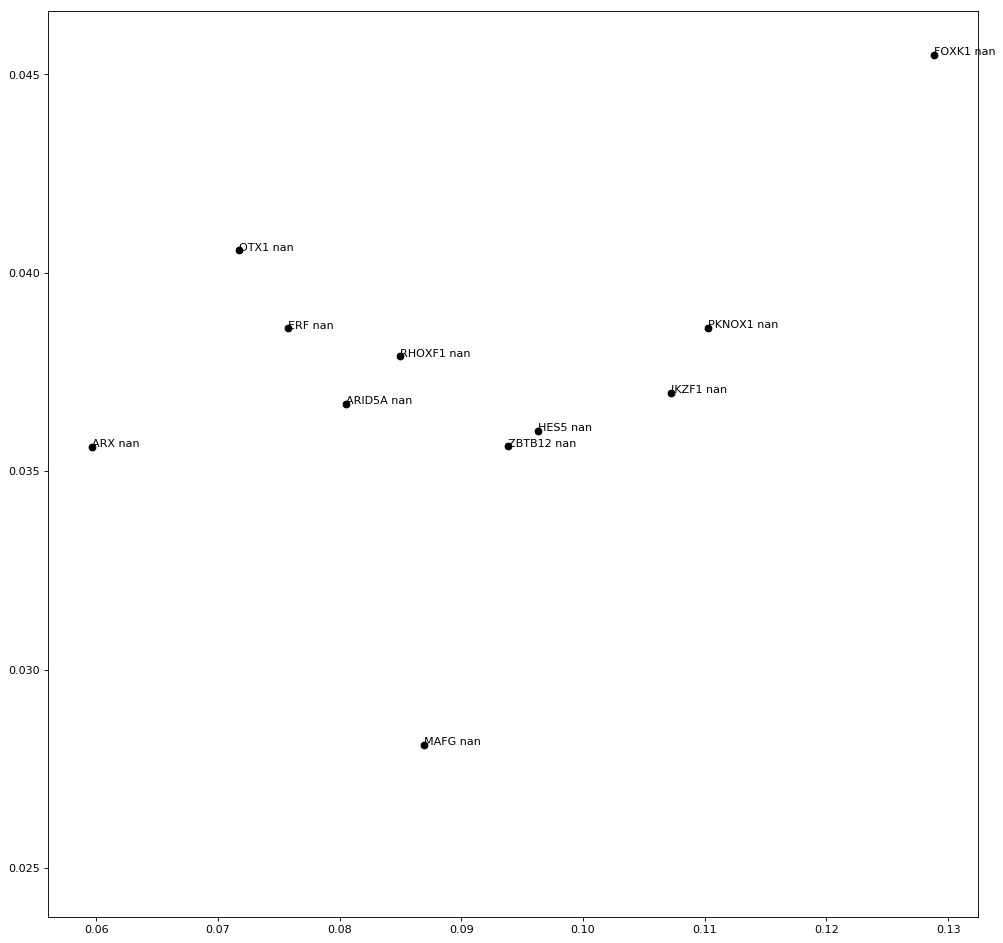

In [3]:
# print(corr_parameters)
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
#for i in list_of_genes[0:2]:
for i in corr_parameters:
#    if corr_parameters[i][2]>40:
        ax.scatter(corr_parameters[i][0], corr_parameters[i][1],c='black')
        ax.annotate(i+" "+str(round(corr_parameters[i][2], 2)),(corr_parameters[i][0], corr_parameters[i][1]))
        print(i, end=' ')

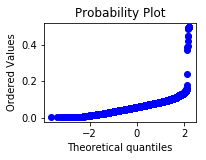

In [4]:
ax1 = plt.subplot(221)
res = stats.probplot(my_data.abs().max(), plot=plt)